<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/Module_4_pt1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running the Apriori Algorithm and Finding Association Rules in Online Retail Datasets
Objective:
This assignment aims to apply the Apriori algorithm and association rule mining to real-world datasets from the online retail sector. You'll gain hands-on experience with transactional data analysis, uncovering patterns, and deriving actionable insights.
Template notebook: https://colab.research.google.com/drive/1mxA_xV6LVZQZuE3ZknMiPMRY8FdpgQp6?usp=sharingLinks to an external site.

Datasets:
1.	Complete Online Retail Dataset (Source: UCI Machine Learning RepositoryLinks to an external site.)
2.	Online Retail II Dataset (Source: UCI Machine Learning RepositoryLinks to an external site.)


In [ ]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

#### Data Loading

In [ ]:
online = pandas.read_excel(
    io="https://github.com/fenago/datasets/raw/main/Online%20Retail%20(5).xlsx"
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
online.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Data Cleaning and Formatting

In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online.InvoiceNo.nunique()))
print("Count of unique customer ids: {cnt}".format(cnt=online.CustomerID.nunique()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


In [ ]:
# If there is a C in the invoice number then that means that it is a "refund"
# create new column called IsCPresent
online['IsCPresent'] = (
# looking for C in InvoiceNo column
    online['InvoiceNo']
# convert column to string type for the apply function below
    .astype(str)
# set element to 1 if C present otherwise 0, this will helpful for step 2
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
IsCPresent              int64
dtype: object

In [ ]:
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online1.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo      object
Description    object
dtype: object

In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# extract unique invoice numbers as list
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print("Length of list of invoice numbers: {ln}".format(ln=len(invoice_no_list)))

Length of list of invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# take subset of invoice number for exercises
subset_invoice_no_list = invoice_no_list[0:5000]
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))

Length of subset list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# filter data set down to based on
# subset of invoice number list
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']]


#### Data Encoding

In [ ]:
online1_encoder = mlxtend.preprocessing.TransactionEncoder()
online1_encoder_array = online1_encoder.fit_transform(invoice_item_list)
print(online1_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online1_encoder_df = pandas.DataFrame(
    online1_encoder_array,
    columns=online1_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online1_encoder_df.loc[
    4970:4979,
    online1_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online1_encoder_df.shape))

Data dimension (row count, col count): (5000, 3136)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Part 1: Running the Apriori Algorithm on the Complet Online Retail Dataset

## 1-1.	Run the Apriori Algorithm: Apply the Apriori algorithm to the full dataset. Set parameters to identify item sets appearing in at least 1% of transactions.

In [ ]:
mod1 = mlxtend.frequent_patterns.apriori(online1_encoder_df)
mod1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [ ]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online1_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


In [ ]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online1_encoder_df,
    min_support=0.05,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [ ]:
# Length is the number of items in the itemsets
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport.loc[180:296]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0208,(COFFEE MUG CAT + BIRD DESIGN),1
181,0.0142,(COFFEE MUG DOG + BALL DESIGN),1
182,0.0132,(COFFEE MUG PEARS DESIGN),1
183,0.0240,(COLOUR GLASS T-LIGHT HOLDER HANGING),1
184,0.0224,(COLOURING PENCILS BROWN TUBE),1
...,...,...,...
292,0.0134,(FRYING PAN UNION FLAG),1
293,0.0154,(FULL ENGLISH BREAKFAST PLATE),1
294,0.0148,(FUNKY WASHING UP GLOVES ASSORTED),1
295,0.0344,(GARLAND WOODEN HAPPY EASTER),1


## 1-2. Analysis of Specific Item Set: Filter to the item set containing "10 COLOUR SPACEBOY PEN." Analyze its support value.

In [ ]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
2,0.0178,(10 COLOUR SPACEBOY PEN),1


## 1-3.	Item Set Length Analysis: Add a column for item set length. Focus on sets of length two with support between 0.02 and 0.021. Compare these to previous results.

In [ ]:
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) &
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
889,0.0200,"(REGENCY CAKESTAND 3 TIER, 6 RIBBONS RUSTIC CH...",2
950,0.0208,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1309,0.0200,"(LUNCH BAG RED RETROSPOT, DOTCOM POSTAGE)",2
1516,0.0208,"(HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...",2
1565,0.0206,"(HEART OF WICKER SMALL, JUMBO BAG RED RETROSPOT)",2
1640,0.0204,"(WHITE HANGING HEART T-LIGHT HOLDER, HOME BUIL...",2
1753,0.0206,"(REGENCY CAKESTAND 3 TIER, JAM MAKING SET WITH...",2
1792,0.0206,"(JUMBO BAG OWLS, JUMBO BAG PINK POLKADOT)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


## 1.4.	Support Value Distribution: Plot the distribution of support values for the identified item sets.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


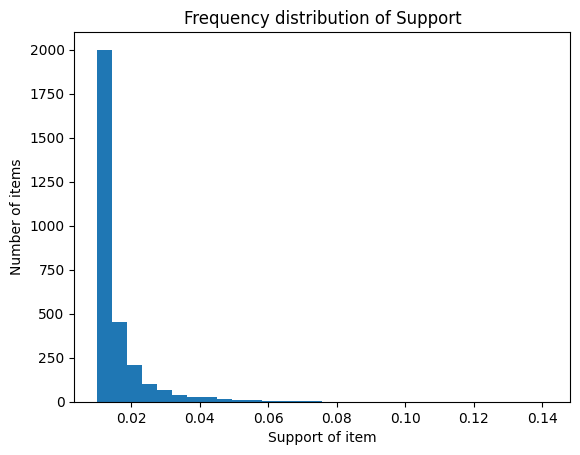

In [ ]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

# Part 2: Finding the Association Rules on the Online Retail II Dataset

## 2.1.	Fit Association Rule Model: Use the full dataset to generate association rules. Apply the confidence metric with a minimum threshold of 0.6.

In [ ]:
rules1 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="confidence",
    min_threshold=0.6,
    support_only=False
)

rules1.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897,0.981478
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812,0.938399
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765,0.942344
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223,0.935857
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589,0.953533
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617,0.971195
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866


## 2.2.	Count and Compare Association Rules: Count the number of derived rules. Compare this with previous exercises.

In [ ]:
print("Number of Associations: {}".format(rules1.shape[0]))

Number of Associations: 1064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.3.	Plot Confidence vs. Support: Create a plot to visualize the relationship between confidence and support for the rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


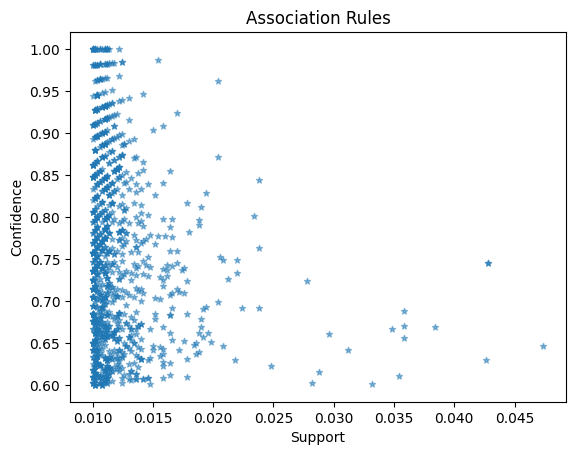

In [ ]:
rules1.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

## 2.4.	Analyze Rule Metrics: Examine the distributions of confidence, lift, leverage, and conviction in your rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


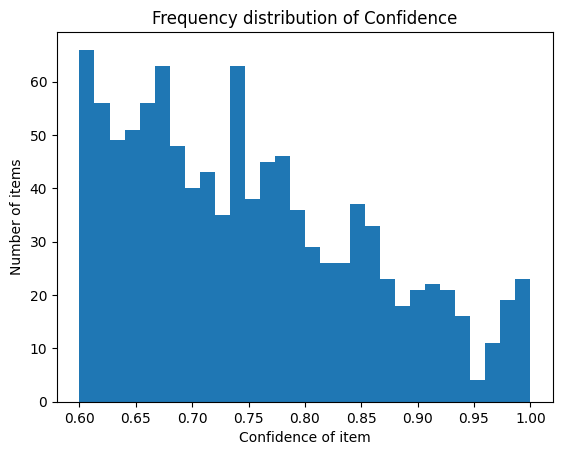

In [ ]:
rules1.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


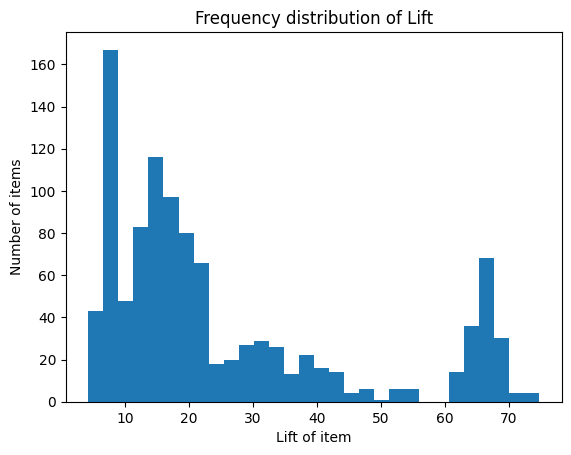

In [ ]:
rules1.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


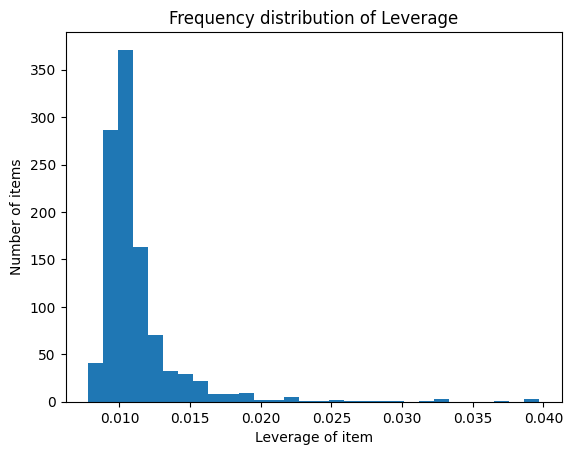

In [ ]:
rules1.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


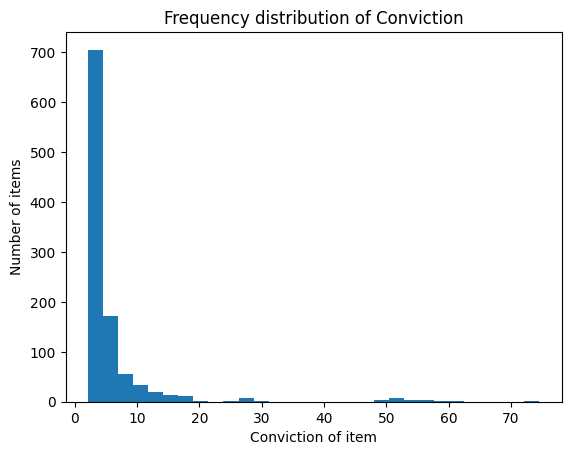

In [ ]:
plt.hist(rules1[numpy.isfinite(rules1['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()

In [ ]:
!pip install pandas mlxtend openpyxl
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load your original dataset into a DataFrame named 'data'
# Assuming 'online2' is your original DataFrame
data = online.copy()

# Step 1: Create a new column 'IsCPresent' to flag refunds
data['IsCPresent'] = data['InvoiceNo'].astype(str).apply(lambda x: 1 if 'C' in x else 0)

# Print output for verification
print("After Step 1 - Flagging Refunds:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 2: Remove transactions with zero or negative quantity
data = data[data['Quantity'] > 0]

# Print output for verification
print("\nAfter Step 2 - Filtering Non-Positive Quantities:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 3: Remove canceled transactions using the 'IsCPresent' flag
data = data[data['IsCPresent'] == 0]

# Print output for verification
print("\nAfter Step 3 - Removing Refunded Transactions:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 4: Select only the 'InvoiceNo' and 'Description' columns
data = data[['InvoiceNo', 'Description']]

# Print output for verification
print("\nAfter Step 4 - Column Filtering:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

# Step 5: Remove missing values
data.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Print output for verification
print("\nAfter Step 5 - Dropping Missing Values:")
print("Data dimension (row count, col count):", data.shape)
print("Count of unique invoice numbers:", data['InvoiceNo'].nunique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After Step 1 - Flagging Refunds:
Data dimension (row count, col count): (133313, 9)
Count of unique invoice numbers: 5000

After Step 2 - Filtering Non-Positive Quantities:
Data dimension (row count, col count): (133313, 9)
Count of unique invoice numbers: 5000

After Step 3 - Removing Refunded Transactions:
Data dimension (row count, col count): (133313, 9)
Count of unique invoice numbers: 5000

After Step 4 - Column Filtering:
Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000

After Step 5 - Dropping Missing Values:
Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
invoice_item_list = []
for num in list(set(data.InvoiceNo.tolist())):
    # Filter dataset down to one invoice number
    tmp_df = data.loc[data['InvoiceNo'] == num]
    # Extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # Append list to invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']]


In [ ]:
online1_encoder = mlxtend.preprocessing.TransactionEncoder()
online1_encoder_array = online1_encoder.fit_transform(invoice_item_list)
print(online1_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
online1_encoder_df = pd.DataFrame(
    online1_encoder_array,
    columns=online1_encoder.columns_
)

# this is a very big table, so for more
# easy viewing only a subset is printed
online1_encoder_df.loc[
    4970:4979,
    online1_encoder_df.columns.tolist()[0:8]
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [ ]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online1_encoder_df)
mod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets


In [ ]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online1_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


In [ ]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online1_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets
mod_colnames_minsupport = apriori(
    online1_encoder_df,
    min_support=0.01,  # Minimum support threshold
    use_colnames=True  # Use the actual item names rather than column indices
)

# Sort the itemsets by support in descending order
mod_colnames_minsupport_sorted = mod_colnames_minsupport.sort_values(by='support', ascending=False)

# Display the first few results of the sorted frequent itemsets
print(mod_colnames_minsupport_sorted.head(7))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                              itemsets
826   0.1416  (WHITE HANGING HEART T-LIGHT HOLDER)
631   0.1196            (REGENCY CAKESTAND 3 TIER)
689   0.1050   (SET OF 3 CAKE TINS PANTRY DESIGN )
400   0.1010             (JUMBO BAG RED RETROSPOT)
358   0.0890               (HEART OF WICKER SMALL)
392   0.0858              (JAM MAKING SET PRINTED)
393   0.0808            (JAM MAKING SET WITH JARS)
